# DSI Capstone Project: Cake Pricing Tool using Image Recognition
## Stage 2: Model Development

#### Overview: 
I preparation for modeling, I have just under 800 images of cakes, split into categories by two variables: 1) Number of Tiers or Shape, and 2) Complexity. Each cake has been classified in both and split into separate training and testing sets for models on each of these variables. 

In [340]:
# Standard Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

# Image Processing Imports
import cv2
from PIL import Image

# Tensor Flow imports:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

%matplotlib inline


### Modeling on Number of Tiers 
#### Setting up Training and Testing Paths and Batches

In [341]:
# Setting up training and testing sets:
train_path_1 = 'images/train_4class' 
test_path_1 = 'images/test_4class'
valid_path_1 = 'images/validation_cakes'

In [363]:
# Setting up batches:
train_batches_1 = ImageDataGenerator().flow_from_directory(directory=train_path_1, 
                                                         target_size=(400,400), 
                                                         classes=['1_Tier', '2_Tier', '3_Tier', 'Sculpted'], 
                                                         batch_size=10)

test_batches_1 = ImageDataGenerator().flow_from_directory(directory=test_path_1, 
                                                        target_size=(400,400), 
                                                        classes=['1_Tier', '2_Tier', '3_Tier', 'Sculpted'], 
                                                        batch_size=10)

valid_batches = ImageDataGenerator().flow_from_directory(directory=valid_path_1,
                                                           target_size=(400,400),
                                                           classes = None,
                                                           class_mode = None,
                                                           batch_size=9,
                                                           shuffle = False)

# ['1_Tier_Complex', '1_Tier_Simple', '2_Tier_Complex', '2_Tier_Simple', '3+_Tier_Complex', '3+_Tier_Simple']

Found 590 images belonging to 4 classes.
Found 200 images belonging to 4 classes.
Found 1 images belonging to 1 classes.


In [364]:
# Function to display images:
# Thank you to deeplizard for this code:

def plotImages(images_arr):
#     if type(images_arr[0]) is np.ndarray:
#         img = np.array(images_arr).astype(np.uint8)
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        img /= 255        
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


# def image_plots(img, figsize=(20,8), rows=1, interp=False, titles=None):
# #     if type(img[0]) is np.ndarray:
# #         img /= 255
# #         if (img.shape[-1] != 3):
# #             img = img.transpose((0,2,3,1))
#     f = plt.figure(figsize=figsize)
#     cols = len(img)//rows if len(img) % 2 == 0 else len(img)//rows + 1
#     img /= 255
#     for i in range(len(img)):
#         sp = f.add_subplot(rows, cols, i+1)
#         sp.axis('Off')
#         if titles is not None:
#             sp.set_title(titles[i], fontsize=10)
#         plt.imshow(img[i], interpolation=None if interp else 'none')

In [365]:
# Image Data Generator embeds both the X and y variables inside each batch, so separating out to view them:
train_images_1, train_labels_1 = next(train_batches_1)
test_images_1, test_labels_1 = next(test_batches_1)
valid_images = next(valid_batches_1)

In [366]:
valid_images[0].shape

(400, 400, 3)

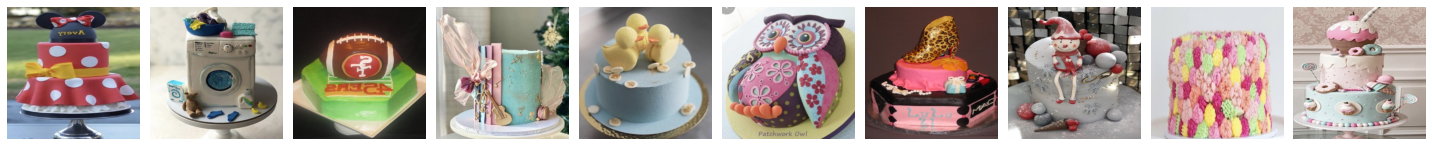

[[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]


In [367]:
plotImages(train_images_1)
print(train_labels_1)

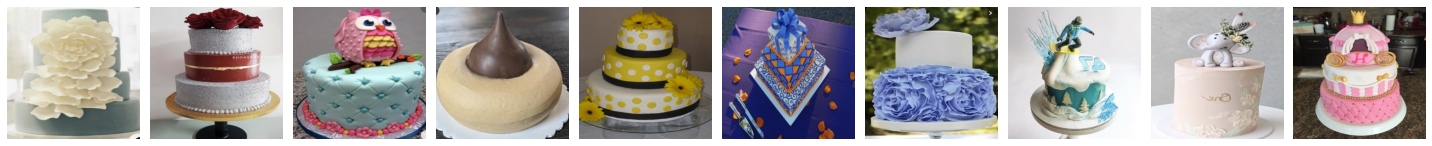

[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]


In [368]:
plotImages(test_images_1)
print(test_labels_1)

#### Model Development

In [370]:
print(train_images_1.shape)
print(train_labels_1.shape)
print(test_images_1.shape)
print(test_labels_1.shape)

(10, 400, 400, 3)
(10, 4)
(10, 400, 400, 3)
(10, 4)


In [377]:
# CNN Model to predict number of tiers and shape of cake: 
tiers = Sequential()
tiers.add(Conv2D(filters=32,                  
                kernel_size=(3,3),           
                activation = 'relu',         
                padding = 'same',
                input_shape = (400,400,3)))  
tiers.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
tiers.add(Conv2D(filters=64,                  
                kernel_size=(3,3),
                activation = 'relu',
                padding = 'same'))
tiers.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
tiers.add(Flatten())
tiers.add(Dense(128, activation='relu'))
tiers.add(Dropout(0.25))
tiers.add(Dense(256, activation='relu'))
tiers.add(Dropout(0.5))
tiers.add(Dense(units=4, activation='softmax'))

In [378]:
tiers.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 400, 400, 32)      896       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 200, 200, 32)      0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 200, 200, 64)      18496     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 100, 100, 64)      0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 640000)            0         
_________________________________________________________________
dense_23 (Dense)             (None, 64)                40960064  
_________________________________________________________________
dropout_13 (Dropout)         (None, 64)              

In [379]:
tiers.compile(optimizer='adam', 
             loss='categorical_crossentropy', 
             metrics=['accuracy'])

In [380]:
# ImageDataGenerator embeds both X and y variables within the batch, so I am only need to set x=train_batches_1
cakery = tiers.fit(x=train_batches_1,
    steps_per_epoch=len(train_batches_1),
    validation_data=test_batches_1,
    validation_steps=len(test_batches_1),
    epochs=30,
    verbose=2)

Epoch 1/30
59/59 - 74s - loss: 600.5636 - accuracy: 0.2746 - val_loss: 1.3668 - val_accuracy: 0.3800
Epoch 2/30
59/59 - 72s - loss: 1.4526 - accuracy: 0.3695 - val_loss: 1.3672 - val_accuracy: 0.3550
Epoch 3/30
59/59 - 72s - loss: 1.3744 - accuracy: 0.3763 - val_loss: 1.3390 - val_accuracy: 0.3700
Epoch 4/30
59/59 - 73s - loss: 1.3104 - accuracy: 0.3797 - val_loss: 1.3263 - val_accuracy: 0.3800
Epoch 5/30
59/59 - 72s - loss: 1.3001 - accuracy: 0.4390 - val_loss: 1.3394 - val_accuracy: 0.3700
Epoch 6/30
59/59 - 73s - loss: 1.2438 - accuracy: 0.4305 - val_loss: 1.3193 - val_accuracy: 0.3800
Epoch 7/30
59/59 - 73s - loss: 1.2347 - accuracy: 0.4712 - val_loss: 1.3173 - val_accuracy: 0.4150
Epoch 8/30
59/59 - 73s - loss: 1.1312 - accuracy: 0.4932 - val_loss: 1.3310 - val_accuracy: 0.3850
Epoch 9/30
59/59 - 73s - loss: 1.1154 - accuracy: 0.5525 - val_loss: 1.3218 - val_accuracy: 0.4050
Epoch 10/30
59/59 - 73s - loss: 1.1277 - accuracy: 0.5305 - val_loss: 1.3314 - val_accuracy: 0.4300
Epoch 1

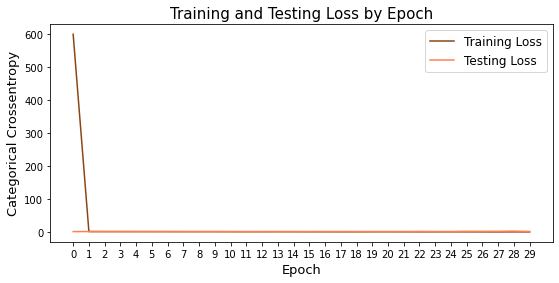

In [409]:
# Graph out the Loss calculations for Training and Test:

train_loss = cakery.history['loss']
test_loss = cakery.history['val_loss']
epoch_labels = cakery.epoch

# Set figure size.
plt.figure(figsize=(9, 4))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='saddlebrown')
plt.plot(test_loss, label='Testing Loss', color='coral')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize=15)
plt.xlabel('Epoch', fontsize=13)
plt.ylabel('Categorical Crossentropy', fontsize=13)
plt.xticks(epoch_labels, epoch_labels)    # ticks, labels

plt.legend(fontsize=12);

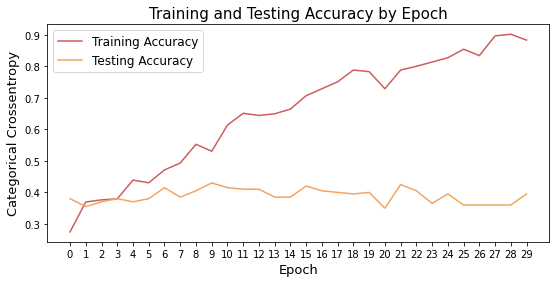

In [411]:
# Graphing out Accuracy for Training and Testing sets:

train_accuracy = cakery.history['accuracy']
test_accuracy = cakery.history['val_accuracy']
epoch_labels = cakery.epoch

# Set figure size.
plt.figure(figsize=(9, 4))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_accuracy, label='Training Accuracy', color='indianred')
plt.plot(test_accuracy, label='Testing Accuracy', color='sandybrown')

# Set title
plt.title('Training and Testing Accuracy by Epoch', fontsize=15)
plt.xlabel('Epoch', fontsize=13)
plt.ylabel('Categorical Crossentropy', fontsize=13)
plt.xticks(epoch_labels, epoch_labels)    # ticks, labels

plt.legend(fontsize=12);

In [440]:
# Get predictions for a single validation cake: 
predictions = tiers.predict(valid_batches_1)
pred_class = np.argmax(tiers.predict(valid_batches_1), axis=-1)

# pred_class = tiers.predict_classes(valid_batches_1) # predict_classes is deprecated

In [441]:
predictions

array([[0.07525934, 0.12231795, 0.07541642, 0.7270063 ]], dtype=float32)

In [442]:
pred_class

array([3])

In [204]:
# Checking numeric class assignments: 
test_batches_1.class_indices

{'1_Tier': 0, '2_Tier': 1, '3_Tier': 2, 'Sculpted': 3}

In [420]:
# Save model to load in Streamlit script:
tiers.save('app/models/tiers.h5')

## Modeling on Simple vs. Complex
#### Setting up Training and Testing Paths and Batches

In [383]:
# Setting up training and testing sets:
train_path_2 = 'images/train_2class' 
test_path_2 = 'images/test_2class'
valid_path_2 = 'images/validation_cakes'

In [384]:
# Setting up batches:
train_batches_2 = ImageDataGenerator().flow_from_directory(directory=train_path_2, 
                                                         target_size=(400,400), 
                                                         classes=['Simple', 'Complex'], 
                                                         batch_size=10)

test_batches_2 = ImageDataGenerator().flow_from_directory(directory=test_path_2, 
                                                        target_size=(400,400), 
                                                        classes=['Simple', 'Complex'], 
                                                        batch_size=10)

valid_batches_2 = ImageDataGenerator().flow_from_directory(directory=valid_path_2,
                                                           target_size=(400,400),
                                                           classes = None,
                                                           class_mode = None,
                                                           batch_size=9,
                                                           shuffle = False)

Found 590 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 1 images belonging to 1 classes.


In [385]:
# Image Data Generator embeds both the X and y variables inside each batch, so separating out to view them:
train_images_2, train_labels_2 = next(train_batches_2)
test_images_2, test_labels_2 = next(test_batches_2)
valid_images_2 = next(valid_batches_2)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]


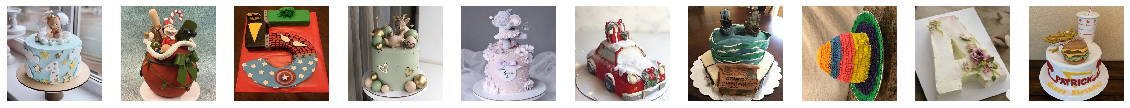

In [265]:
# Batch of training images and labels:
plotImages(train_images_2)
print(train_labels_2)

[[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


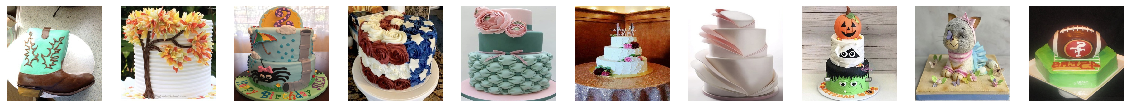

In [266]:
# Batch of testing images and labels:
plotImages(test_images_2)
print(test_labels_2)

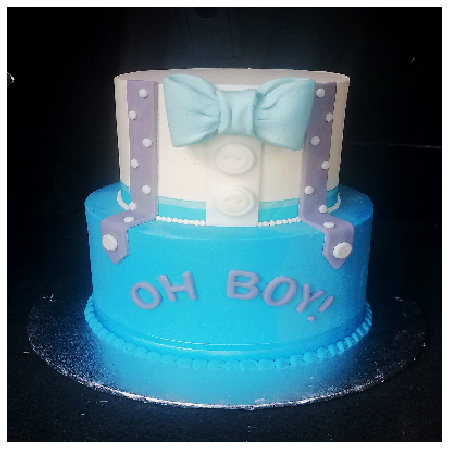

In [267]:
image_plots(valid_images_2)

#### Model Development

In [386]:
# Quick check on shapes of our training and test data:
print(train_images_2.shape)
print(train_labels_2.shape)
print(test_images_2.shape)
print(test_labels_2.shape)

(10, 400, 400, 3)
(10, 2)
(10, 400, 400, 3)
(10, 2)


In [421]:
# CNN Model to detect complexity level in two classes:
type = Sequential()
type.add(Conv2D(filters=32,                  
                kernel_size=(3,3),           
                activation = 'relu',         
                padding = 'same',
                input_shape = (400,400,3)))  
type.add(MaxPooling2D(pool_size=(2, 2)))
type.add(Conv2D(filters=64,                  
                kernel_size=(3,3),
                activation = 'relu',
                padding = 'same'))
type.add(MaxPooling2D(pool_size=(2, 2)))
type.add(Flatten())
type.add(Dense(64, activation='relu'))
type.add(Dropout(0.5))
# type.add(Dense(32, activation='relu'))
# type.add(Dropout(0.5))
type.add(Dense(units=2, activation='softmax'))

In [422]:
type.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 400, 400, 32)      896       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 200, 200, 32)      0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 200, 200, 64)      18496     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 100, 100, 64)      0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 640000)            0         
_________________________________________________________________
dense_30 (Dense)             (None, 64)                40960064  
_________________________________________________________________
dropout_17 (Dropout)         (None, 64)              

In [423]:
type.compile(optimizer='adam', 
             loss='categorical_crossentropy', 
             metrics=['accuracy'])

In [424]:
# As above, ImageDataGenerator has embedded both X and y variables within the batch, so I am only need to set x=train_batches_2
cakery3 = type.fit(x=train_batches_2,
    steps_per_epoch=len(train_batches_2),
    validation_data=test_batches_2,
    validation_steps=len(test_batches_2),
    epochs=20,
    verbose=2)

Epoch 1/20
59/59 - 92s - loss: 614.7463 - accuracy: 0.5322 - val_loss: 0.7376 - val_accuracy: 0.5550
Epoch 2/20
59/59 - 85s - loss: 0.6647 - accuracy: 0.5407 - val_loss: 0.7069 - val_accuracy: 0.5600
Epoch 3/20
59/59 - 77s - loss: 0.6644 - accuracy: 0.6220 - val_loss: 0.7728 - val_accuracy: 0.5550
Epoch 4/20
59/59 - 75s - loss: 0.5501 - accuracy: 0.6763 - val_loss: 0.7750 - val_accuracy: 0.5850
Epoch 5/20
59/59 - 91s - loss: 0.4470 - accuracy: 0.7407 - val_loss: 1.0871 - val_accuracy: 0.5350
Epoch 6/20
59/59 - 100s - loss: 0.3465 - accuracy: 0.8305 - val_loss: 1.1433 - val_accuracy: 0.5800
Epoch 7/20
59/59 - 92s - loss: 0.3254 - accuracy: 0.8610 - val_loss: 1.1907 - val_accuracy: 0.5800
Epoch 8/20
59/59 - 93s - loss: 0.1980 - accuracy: 0.9068 - val_loss: 1.2143 - val_accuracy: 0.5600
Epoch 9/20
59/59 - 86s - loss: 0.1677 - accuracy: 0.9271 - val_loss: 1.2389 - val_accuracy: 0.6050
Epoch 10/20
59/59 - 87s - loss: 0.2540 - accuracy: 0.9169 - val_loss: 1.4102 - val_accuracy: 0.5700
Epoch 

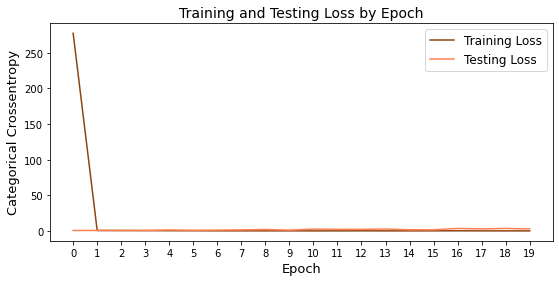

In [418]:
# Graph Loss for Training and Testing sets: 

train_loss = cakery3.history['loss'][:20]
test_loss = cakery3.history['val_loss'][:20]
epoch_labels = cakery3.epoch[:20]

# Set figure size.
plt.figure(figsize=(9, 4))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='saddlebrown')
plt.plot(test_loss, label='Testing Loss', color='coral')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize=14)
plt.xlabel('Epoch', fontsize=13)
plt.ylabel('Categorical Crossentropy', fontsize=13)
plt.xticks(epoch_labels, epoch_labels)    # ticks, labels

plt.legend(fontsize=12);

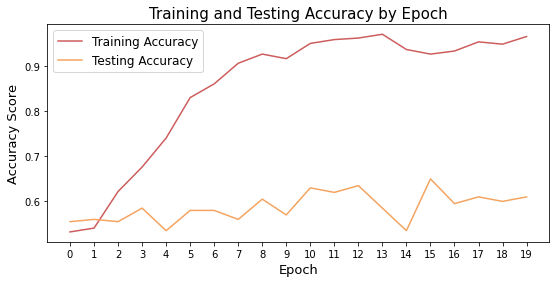

In [425]:
# Graph Accuracy for Training and Testing sets: 

train_accuracy = cakery3.history['accuracy'][:20]
test_accuracy = cakery3.history['val_accuracy'][:20]
epoch_labels = cakery3.epoch[:20]

# Set figure size.
plt.figure(figsize=(9, 4))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_accuracy, label='Training Accuracy', color='indianred')
plt.plot(test_accuracy, label='Testing Accuracy', color='sandybrown')

# Set title
plt.title('Training and Testing Accuracy by Epoch', fontsize=15)
plt.xlabel('Epoch', fontsize=13)
plt.ylabel('Accuracy Score', fontsize=13)
plt.xticks(epoch_labels, epoch_labels)    # ticks, labels

plt.legend(fontsize=12);

In [437]:
# Get predictions for a single validation cake: 
preds = type.predict(valid_batches_2)
pred_class_2 = np.argmax(type.predict(valid_batches_2), axis=-1)

#pred_class_2 = type.predict_classes(valid_batches_2) # predict_classes is deprecated

In [438]:
preds

array([[4.032642e-09, 1.000000e+00]], dtype=float32)

In [439]:
pred_class_2

array([1])

In [430]:
# Checking class assignments for prediction matching to price lookup table
test_batches_2.class_indices

{'Simple': 0, 'Complex': 1}

In [436]:
# Save model to load in Streamlit script:
type.save('app/models/type.h5') 